In [1]:
import physicl as phys
import physicl.light as light
import physicl.newton as newton
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n_0 = phys.Measurement(2.5e5, "m**-3")
r_0 = phys.Measurement(8.6e3, "m")
R_E = phys.Measurement(6371e3, "m**1")


cl_n = "{} * exp(-1 * ({} - {})/({}))".format(n_0, "sqrt(pow(r0[gid], 2) + pow(r1[gid], 2) + pow(r2[gid], 2))", R_E, r_0)

def n(x, y, z):
    return n_0 * np.exp(-(np.sqrt(sum(np.square([x, y, z]))) - R_E)/r_0)

fig = plt.figure()
ax = fig.gca(projection='3d')
x, y = np.meshgrid(np.arange(-1e6, 1e6, 0.01e7), np.arange(-1e6, 1e6, 0.01e7))
z = n(x, y, 8e6)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Number Density vs. Position ($z = 8.0 \cdot 10^6$ m)")

ax.plot_wireframe(x, y, z)
plt.show()

<Figure size 640x480 with 1 Axes>

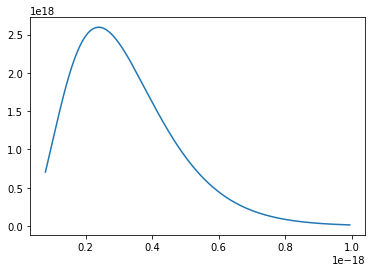

In [2]:
T = 5778
Eg = np.linspace(phys.light.E_from_wavelength(200e-9), phys.light.E_from_wavelength(2500e-9), 1000)
gamma = phys.light.planck_distribution(Eg, T)

E = [phys.light.planck_phot_distribution(phys.light.E_from_wavelength(200e-9), phys.light.E_from_wavelength(2500e-9), T, bins=50000) for x in range(10000)]
phot = phys.light.generate_photons_from_E(E)
for p in phot:
    p.r = phys.Measurement([-6440e3 * 5, 0, 0], "m**1")
plt.plot(Eg, gamma)
plt.show()

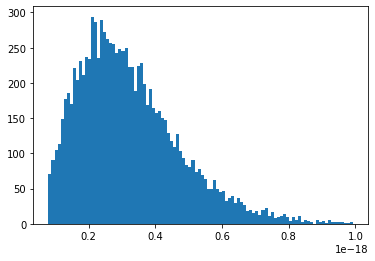

In [3]:
plt.hist(E, 100)
plt.show()

In [4]:
runtime = ((6440 * 5 + 6440) * 1e3 / phys.light.c) * 5
print("Target runtime: " + str(runtime))
A_targ = phys.Measurement(5.1e-31, "m**2") * (phys.Measurement(532e-9, "m**1") ** 4)
sim = phys.Simulation(cl_on=True, exit=lambda cond: cond.t >= runtime)

sim.add_step(2, phys.UpdateTimeStep(lambda t: phys.Measurement(0.001, "s**1")))
sim.add_step(1, newton.NewtonianKinematicsStep())
sim.add_step(3, light.ScatterIsotropicStep(A=A_targ, variable_n = True, variable_n_fn = cl_n, wavelength_dep_scattering=True))

tp = phys.light.TracePathMeasureStep(None)
sim.add_step(0, tp)
sim.add_objs(phot)

Target runtime: 0.6444458319228298


In [5]:
import time
sim.start()

while sim.running:
    time.sleep(1)
    print(sim.get_state())

{'objects': 10000, 't': 0.001 s**1, 'dt': 0.001 s**1, 'run_time': 1.011213779449463}
{'objects': 10000, 't': 0.002 s**1, 'dt': 0.001 s**1, 'run_time': 2.058410167694092}
{'objects': 10000, 't': 0.002 s**1, 'dt': 0.001 s**1, 'run_time': 3.070622205734253}
{'objects': 10000, 't': 0.003 s**1, 'dt': 0.001 s**1, 'run_time': 4.100809812545776}
{'objects': 10000, 't': 0.003 s**1, 'dt': 0.001 s**1, 'run_time': 5.148994207382202}
{'objects': 10000, 't': 0.004 s**1, 'dt': 0.001 s**1, 'run_time': 6.161205291748047}
{'objects': 10000, 't': 0.004 s**1, 'dt': 0.001 s**1, 'run_time': 7.191404104232788}
{'objects': 10000, 't': 0.005 s**1, 'dt': 0.001 s**1, 'run_time': 8.237590551376343}
{'objects': 10000, 't': 0.005 s**1, 'dt': 0.001 s**1, 'run_time': 9.326741933822632}
{'objects': 10000, 't': 0.006 s**1, 'dt': 0.001 s**1, 'run_time': 10.33395791053772}
{'objects': 10000, 't': 0.007 s**1, 'dt': 0.001 s**1, 'run_time': 11.36316990852356}
{'objects': 10000, 't': 0.007 s**1, 'dt': 0.001 s**1, 'run_time':

{'objects': 10000, 't': 0.048000000000000036 s**1, 'dt': 0.001 s**1, 'run_time': 88.76293921470642}
{'objects': 10000, 't': 0.04900000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 89.81011462211609}
{'objects': 10000, 't': 0.04900000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 91.05514454841614}
{'objects': 10000, 't': 0.05000000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 92.07634997367859}
{'objects': 10000, 't': 0.05100000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 93.09355854988098}
{'objects': 10000, 't': 0.05100000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 94.12275743484497}
{'objects': 10000, 't': 0.05200000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 95.16994261741638}
{'objects': 10000, 't': 0.05200000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 96.18216466903687}
{'objects': 10000, 't': 0.05300000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 97.23933434486389}
{'objects': 10000, 't': 0.05300000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 98.28553032875061}
{'objects

{'objects': 10000, 't': 0.09500000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 174.6770739555359}
{'objects': 10000, 't': 0.09500000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 175.70728588104248}
{'objects': 10000, 't': 0.09600000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 176.73548412322998}
{'objects': 10000, 't': 0.09600000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 177.74270129203796}
{'objects': 10000, 't': 0.09700000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 178.7998650074005}
{'objects': 10000, 't': 0.09700000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 179.90200877189636}
{'objects': 10000, 't': 0.09800000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 180.9082372188568}
{'objects': 10000, 't': 0.09900000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 181.92044925689697}
{'objects': 10000, 't': 0.09900000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 182.9326503276825}
{'objects': 10000, 't': 0.10000000000000007 s**1, 'dt': 0.001 s**1, 'run_time': 183.9628484249115}
{'obj

{'objects': 10000, 't': 0.1440000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 261.0029435157776}
{'objects': 10000, 't': 0.1440000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 262.01416873931885}
{'objects': 10000, 't': 0.1450000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 263.0603425502777}
{'objects': 10000, 't': 0.1450000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 264.0775499343872}
{'objects': 10000, 't': 0.1460000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 265.0827798843384}
{'objects': 10000, 't': 0.1470000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 266.09498023986816}
{'objects': 10000, 't': 0.1470000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 267.1251780986786}
{'objects': 10000, 't': 0.1480000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 268.1374032497406}
{'objects': 10000, 't': 0.1480000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 269.18958473205566}
{'objects': 10000, 't': 0.1490000000000001 s**1, 'dt': 0.001 s**1, 'run_time': 270.1957895755768}
{'objects': 10000

{'objects': 10000, 't': 0.19200000000000014 s**1, 'dt': 0.001 s**1, 'run_time': 347.5071928501129}
{'objects': 10000, 't': 0.19300000000000014 s**1, 'dt': 0.001 s**1, 'run_time': 348.53639101982117}
{'objects': 10000, 't': 0.19300000000000014 s**1, 'dt': 0.001 s**1, 'run_time': 349.5496025085449}
{'objects': 10000, 't': 0.19400000000000014 s**1, 'dt': 0.001 s**1, 'run_time': 350.55582070350647}
{'objects': 10000, 't': 0.19500000000000015 s**1, 'dt': 0.001 s**1, 'run_time': 351.56704545021057}
{'objects': 10000, 't': 0.19500000000000015 s**1, 'dt': 0.001 s**1, 'run_time': 352.59623169898987}
{'objects': 10000, 't': 0.19600000000000015 s**1, 'dt': 0.001 s**1, 'run_time': 353.6294400691986}
{'objects': 10000, 't': 0.19600000000000015 s**1, 'dt': 0.001 s**1, 'run_time': 354.63965487480164}
{'objects': 10000, 't': 0.19700000000000015 s**1, 'dt': 0.001 s**1, 'run_time': 355.64885663986206}
{'objects': 10000, 't': 0.19700000000000015 s**1, 'dt': 0.001 s**1, 'run_time': 357.24861192703247}
{'o

{'objects': 10000, 't': 0.2420000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 434.56444811820984}
{'objects': 10000, 't': 0.2420000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 435.59464740753174}
{'objects': 10000, 't': 0.2430000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 436.62484431266785}
{'objects': 10000, 't': 0.2430000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 437.6310625076294}
{'objects': 10000, 't': 0.2440000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 438.6372911930084}
{'objects': 10000, 't': 0.2450000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 439.66747641563416}
{'objects': 10000, 't': 0.2450000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 440.68469762802124}
{'objects': 10000, 't': 0.2460000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 441.6968982219696}
{'objects': 10000, 't': 0.2470000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 442.7450840473175}
{'objects': 10000, 't': 0.2470000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 443.7732820510864}
{'objects': 100

{'objects': 10000, 't': 0.2920000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 522.2102925777435}
{'objects': 10000, 't': 0.2930000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 523.2215168476105}
{'objects': 10000, 't': 0.2930000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 524.2337291240692}
{'objects': 10000, 't': 0.2940000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 525.251936674118}
{'objects': 10000, 't': 0.2940000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 526.2931141853333}
{'objects': 10000, 't': 0.2950000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 527.3093237876892}
{'objects': 10000, 't': 0.2960000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 528.3684997558594}
{'objects': 10000, 't': 0.2960000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 529.3867189884186}
{'objects': 10000, 't': 0.2970000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 530.398931980133}
{'objects': 10000, 't': 0.2970000000000002 s**1, 'dt': 0.001 s**1, 'run_time': 531.4680995941162}
{'objects': 10000, 't'

{'objects': 10000, 't': 0.34200000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 610.2428007125854}
{'objects': 10000, 't': 0.34300000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 611.2729992866516}
{'objects': 10000, 't': 0.34300000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 612.3101918697357}
{'objects': 10000, 't': 0.34400000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 613.3164088726044}
{'objects': 10000, 't': 0.34500000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 614.3635821342468}
{'objects': 10000, 't': 0.34500000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 615.4097681045532}
{'objects': 10000, 't': 0.34600000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 616.4509699344635}
{'objects': 10000, 't': 0.34700000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 617.4971442222595}
{'objects': 10000, 't': 0.34700000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 618.5273540019989}
{'objects': 10000, 't': 0.34800000000000025 s**1, 'dt': 0.001 s**1, 'run_time': 619.5615501403809}
{'objects'

{'objects': 10000, 't': 0.3920000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 699.024703502655}
{'objects': 10000, 't': 0.3930000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 700.0608956813812}
{'objects': 10000, 't': 0.3930000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 701.1230690479279}
{'objects': 10000, 't': 0.3940000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 702.152268409729}
{'objects': 10000, 't': 0.3950000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 703.163494348526}
{'objects': 10000, 't': 0.3950000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 704.1817018985748}
{'objects': 10000, 't': 0.3960000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 705.2298748493195}
{'objects': 10000, 't': 0.3960000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 706.242086648941}
{'objects': 10000, 't': 0.3970000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 707.2603058815002}
{'objects': 10000, 't': 0.3980000000000003 s**1, 'dt': 0.001 s**1, 'run_time': 708.2725186347961}
{'objects': 10000, 't': 

{'objects': 10000, 't': 0.44300000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 786.9009883403778}
{'objects': 10000, 't': 0.44300000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 787.9431793689728}
{'objects': 10000, 't': 0.44400000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 788.9494078159332}
{'objects': 10000, 't': 0.44500000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 789.9616093635559}
{'objects': 10000, 't': 0.44500000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 790.9728212356567}
{'objects': 10000, 't': 0.44600000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 792.0200049877167}
{'objects': 10000, 't': 0.44600000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 793.060197353363}
{'objects': 10000, 't': 0.44700000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 794.0664250850677}
{'objects': 10000, 't': 0.44800000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 795.0956130027771}
{'objects': 10000, 't': 0.44800000000000034 s**1, 'dt': 0.001 s**1, 'run_time': 796.1418101787567}
{'objects':

{'objects': 10000, 't': 0.4930000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 874.57377576828}
{'objects': 10000, 't': 0.4940000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 875.5859780311584}
{'objects': 10000, 't': 0.4940000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 876.5981917381287}
{'objects': 10000, 't': 0.4950000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 877.6243929862976}
{'objects': 10000, 't': 0.4950000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 880.789929151535}
{'objects': 10000, 't': 0.4960000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 881.8461089134216}
{'objects': 10000, 't': 0.4960000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 882.8673129081726}
{'objects': 10000, 't': 0.4970000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 883.9045069217682}
{'objects': 10000, 't': 0.4980000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 884.9167189598083}
{'objects': 10000, 't': 0.4980000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 885.9289321899414}
{'objects': 10000, 't':

{'objects': 10000, 't': 0.5430000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 964.3718905448914}
{'objects': 10000, 't': 0.5440000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 965.384113073349}
{'objects': 10000, 't': 0.5450000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 966.3963258266449}
{'objects': 10000, 't': 0.5450000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 967.4445102214813}
{'objects': 10000, 't': 0.5460000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 968.4567224979401}
{'objects': 10000, 't': 0.5460000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 969.4749302864075}
{'objects': 10000, 't': 0.5470000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 970.4891407489777}
{'objects': 10000, 't': 0.5480000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 971.5243244171143}
{'objects': 10000, 't': 0.5480000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 972.5365481376648}
{'objects': 10000, 't': 0.5490000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 973.5657472610474}
{'objects': 10000, 't

{'objects': 10000, 't': 0.5970000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1052.4613547325134}
{'objects': 10000, 't': 0.5970000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1053.4735698699951}
{'objects': 10000, 't': 0.5980000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1054.4907772541046}
{'objects': 10000, 't': 0.5990000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1055.503001689911}
{'objects': 10000, 't': 0.5990000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1056.515214920044}
{'objects': 10000, 't': 0.6000000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1057.551408290863}
{'objects': 10000, 't': 0.6000000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1058.5765991210938}
{'objects': 10000, 't': 0.6010000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1059.5838265419006}
{'objects': 10000, 't': 0.6020000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1060.5960443019867}
{'objects': 10000, 't': 0.6020000000000004 s**1, 'dt': 0.001 s**1, 'run_time': 1061.6082515716553}
{'objects': 1

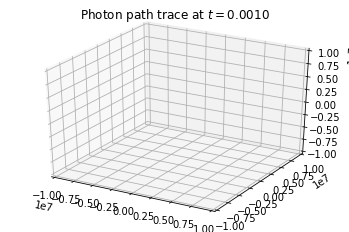

In [6]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def update(frame):
    plt.cla()
    plt.xlim(-1e7, 1e7)
    plt.ylim(-1e7, 1e7)
    plt.title("Photon path trace at $t = {:.4f}$".format(tp.data[0][frame + 1]))
    ax.set_zlim(-1e7, 1e7)
    for i in range(99):
        xs = [x[0] for x in tp.data[1 + i][1:(frame + 1)]]
        ys = [x[1] for x in tp.data[1 + i][1:(frame + 1)]]
        zs = [x[2] for x in tp.data[1 + i][1:(frame + 1)]]
        ax.plot(xs, ys, zs, label="Path of Photon " + str(i))
        ax.scatter(xs, ys, zs)
        
ani = FuncAnimation(fig, update, len(tp.data[2]) - 1)
ani.save("trace_path.mp4", "ffmpeg", fps=30, dpi=144)

plt.show()